Violeta García

<img style="float: left; margin: 15px 15px 15px 15px;" src="http://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width="180" height="50" />

# Simulación de Procesos Financieros

## <font color= blue > Tarea VIII
    Técnicas de Reducción de Varianza

*Ejercicio tomado de: Introduction to Operations Research, 9ª ed. pag, 1148.*


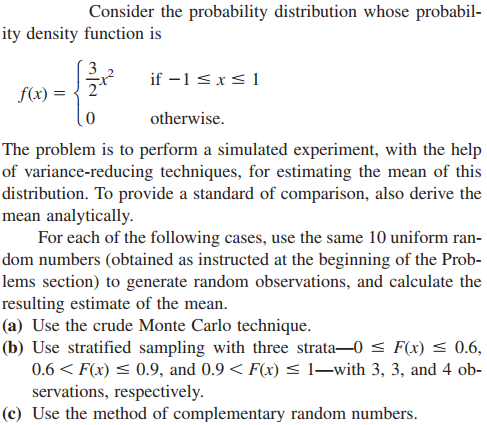

Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

$$F(x)=\int_{-1}^{x}\frac{3}{2}y^2\text{d}y=\left.\frac{y^3}{2}\right|_{y=-1}^{y=x}=\frac{x^3}{2}-\frac{(-1)^3}{2}$$

>$$ U = \frac{x^3}{2}+\frac{1}{2}$$
>
> $$ U - \frac{1}{2} = \frac{x^3}{2}$$
>
> $$ 2(U - \frac{1}{2}) = x^3 $$
>
> $$ x = \sqrt[3]{2(U - \frac{1}{2})}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [167]:
f = lambda x: (3/2)*x**2 if x>= -1 and x <= 1 else 0
xi = lambda u: (2*(u-0.5))**(1/3) if u > 0.5 else -(2*(0.5-u))**(1/3)

In [96]:
# a)
np.random.seed(100)
N = 10
a =  np.random.uniform(0, 1, N)

muestra = np.asarray(list(map(xi, a)))

muestra.mean()

[ 0.44278176 -0.76246501 -0.53246604  0.88346442 -0.99684415 -0.9113227
  0.69897685  0.86699607 -0.89900582  0.53154959]


-0.06783350231646393

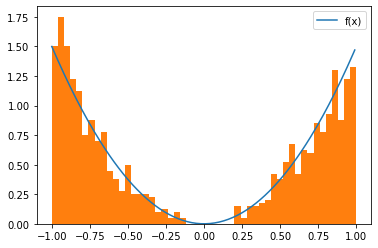

In [154]:
x = np.arange(-1,1,0.01)
muestra = np.asarray(list(map(xi, np.random.uniform(0, 1, 1000) )))

plt.plot(x,list(map(f,x)),label='f(x)')
plt.hist(muestra, density = True, bins = 50)
plt.legend()
plt.show()

In [103]:
# b)
n1 = 3; n2 = 3; n3 = 4
suma = n1+n2+n3
r1 = np.random.uniform(0, 0.6, n1)
r2 = np.random.uniform(0.6, 0.9, n2)
r3 = np.random.uniform(0.9, 1, n3)
r = [r1, r2, r3]

#Encontrar ponderación 
w1 = n1/suma/0.6
w2 = n2/suma/0.3
w3 = n3/suma/0.1
w = [w1, w2, w3]

muestras2 = list(map(lambda x: np.asarray(list(map(xi, x))), r))

#Cada xi y dividirlo por wi
Estratif1 = list(map(lambda x, wi: x/wi, muestras2, w))

#Sacar la media, pero para esto
Estratif = np.concatenate(Estratif1)
med = np.mean(Estratif)
print(med)

-0.04860186384801916


In [171]:
# c)
u1 = np.random.rand(5)
u2 = 1-u1
U = [u1, u2]

muestras4 = list(map(lambda u: np.asarray(list(map(xi, u))), U))
np.mean(muestras4)


0.0

In [161]:
def estratos(a, b, N):
    U2 = np.random.uniform(a,b,N)
    i = np.arange(0,N)
    v = (U2+i)/N
    return v

In [153]:
# d)
B = [2, 4, 6, 10]

a =  np.asarray(list(map(lambda x: estratos(0, 1, x), B)))

muestras = np.asarray(list(map(lambda x: np.asarray(list(map(xi, x))), a)))

med = [np.mean(muestras[x]) for x in range(4)]
print(med)

[0.10808704682656772, 0.045247757088493434, 0.030514648478610223, -0.02158350262260489]
